In [14]:
# 생각한 시각화 : 꺾은선 그래프 2개를 동시에 합쳐서 보여주기

In [15]:
import pandas as pd

In [16]:
search_naver=pd.read_csv('C:\\rawData\\개인형 이동장치_네이버_월간검색트렌드.csv')
search_naver

,period,searchVolume
0,2019-11,0
1,2019-12,0
2,2020-01,0
3,2020-02,0
4,2020-03,0
5,2020-04,0
6,2020-05,310
7,2020-06,980
8,2020-07,660
9,2020-08,320


In [17]:
search_google=pd.read_csv('C:\\rawData\\전동 킥보드_구글_검색트렌드.csv')
search_google

,period,searchVolume
0,21-11,12100
1,21-12,9900
2,22-01,8100
3,22-02,8100
4,22-03,12100
5,22-04,14800
6,22-05,18100
7,22-06,14800
8,22-07,14800
9,22-08,12100


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [19]:
search_google_new = search_google.iloc[1:,:]
search_google_new

,period,searchVolume
1,21-12,9900
2,22-01,8100
3,22-02,8100
4,22-03,12100
5,22-04,14800
6,22-05,18100
7,22-06,14800
8,22-07,14800
9,22-08,12100
10,22-09,14800


In [20]:
import matplotlib as mpl
print(mpl.matplotlib_fname())

c:\Users\UOS\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [21]:
print(mpl.get_cachedir())

C:\Users\UOS\.matplotlib


In [22]:
print(mpl.rcParams['font.family'])
print(mpl.rcParams['font.size'])

['NanumSquare Neo Regular']
12.0


In [23]:
mpl.rcParams['font.family'] = 'NanumSquare Neo Regular'
mpl.rcParams['font.size'] = 12

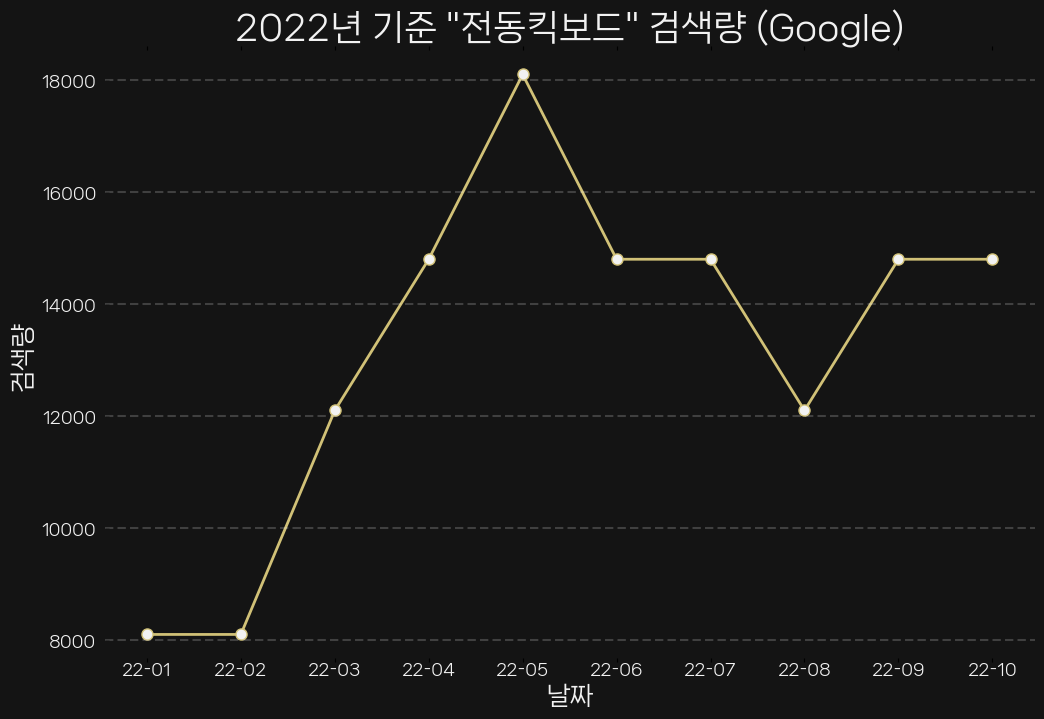

In [33]:
import matplotlib.pyplot as plt
import numpy as np
 
#mean_search = int(np.mean(search_google['searchVolume']))
search_google_new = search_google.iloc[2:,:]

fig = plt.figure(figsize=(12,8)) ## 캔버스 생성
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
ax.spines['right'].set_visible(False) ## 오른쪽 축 숨김
ax.spines['top'].set_visible(False) ## 위쪽 축 숨김
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

fig.patch.set_facecolor('#141414')
ax.set_facecolor('#141414')

args_plot = [search_google_new['period'], search_google_new['searchVolume']] ## 데이터 인자
config_plot = dict( ## 키워드 인자
    color='#d1c177', # 선 색깔
    linestyle='solid', # 선 스타일
    linewidth=2, # 선 두께 
    marker='o', # 마커 모양
    markersize=8, # 마커 사이즈
    markerfacecolor='#f2f2f2',
    markeredgecolor='#d1c177', # 마커 테두리 색깔
    markeredgewidth=1, # 마커 테두리 두께
)
 
line_plot = ax.plot(label='searchVolume', *args_plot,**config_plot) ## 선그래프 생성 - 범례라벨 추가
line_plot = line_plot[0]
 
#ax.axhline(mean_search,label='Mean') ## 평균값을 y좌표로 하는 수평선 생성
#ax.text(0,mean_search+10,f'평균검색량: {mean_search}',fontsize=13,color='white') ## 평균 매출 텍스트 출력
'''
bbox = dict(
    boxstyle='square',
    facecolor='white',
)
 
for coord in list(line_plot.get_xydata()):
    ax.text(coord[0],coord[1]+10,f'{int(coord[1])}',fontsize=12, ha='center', bbox=bbox)
''' 
ylim = ax.get_ylim() ## 기존의 y축 범위를 저장
 
yticks = list(ax.get_yticks()) ## y축 눈금을 가져온다.
 
for y in yticks:
    ax.axhline(y,linestyle=(0,(4,2)),color='#f2f2f2',alpha=0.2) ## 눈금선 생성
 

ax.set_yticks(yticks) ## 평균이 포함된 y눈금으로 새롭게 세팅한다.
ax.set_ylim(ylim) ## 기존의 y축 범위를 유지

plt.yticks(fontsize=15) ## y축 눈금 크기 설정
plt.xticks(fontsize=15) ## x축 눈금 회전각도와 크기 설정
 
plt.ylabel('검색량',fontsize=18, color='#f2f2f2') ## y축 라벨
plt.xlabel('날짜',fontsize=18, color='#f2f2f2') ## x축 라벨
plt.title('2022년 기준 "전동킥보드" 검색량 (Google)',fontsize=25, color='#f2f2f2') ## 타이틀 설정
plt.tick_params(axis='x', direction='in', length=3, pad=0, labelsize=12, labelcolor='#f2f2f2', top=True)
plt.tick_params(axis='y', direction='in', length=3, pad=6, labelsize=12, labelcolor='#f2f2f2', top=True)

plt.show()

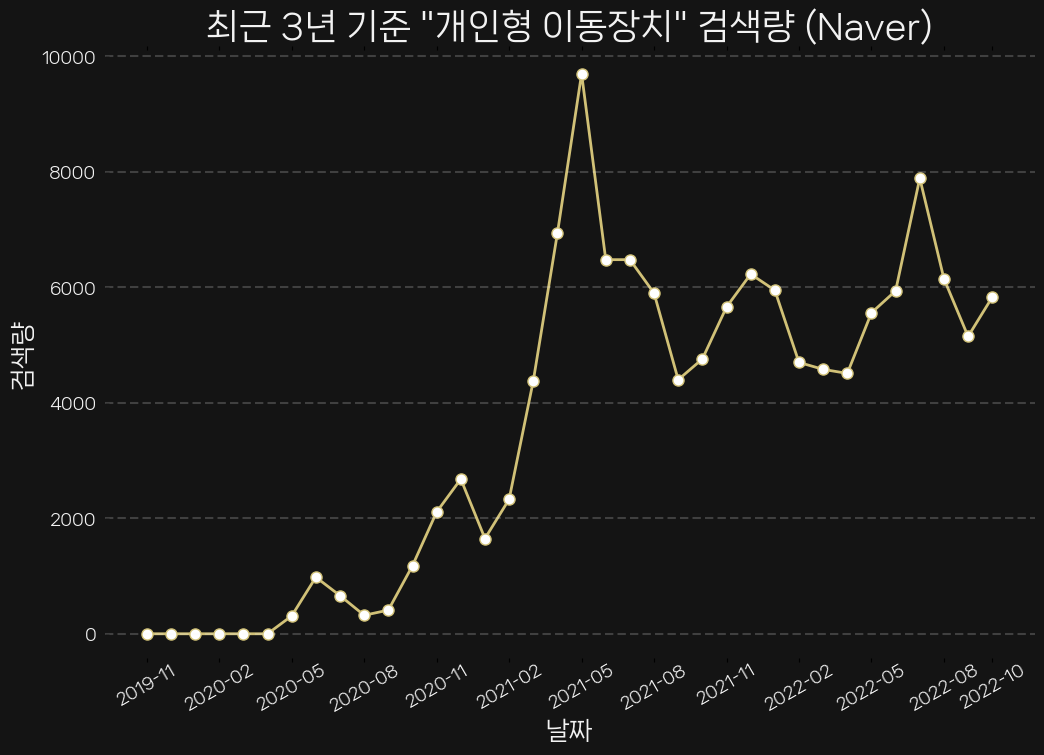

In [34]:
import matplotlib.pyplot as plt
import numpy as np
 
mean_search = int(np.mean(search_naver['searchVolume']))
 
fig = plt.figure(figsize=(12,8)) ## 캔버스 생성
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
ax.spines['right'].set_visible(False) ## 오른쪽 축 숨김
ax.spines['top'].set_visible(False) ## 위쪽 축 숨김
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

fig.patch.set_facecolor('#141414')
ax.set_facecolor('#141414')

args_plot = [search_naver['period'], search_naver['searchVolume']] ## 데이터 인자
config_plot = dict( ## 키워드 인자
    color='#d1c177', # 선 색깔
    linestyle='solid', # 선 스타일
    linewidth=2, # 선 두께 
    marker='o', # 마커 모양
    markersize=8, # 마커 사이즈
    markerfacecolor='w',
    markeredgecolor='#d1c177', # 마커 테두리 색깔
    markeredgewidth=1, # 마커 테두리 두께
)
 
line_plot = ax.plot(label='검색량', *args_plot,**config_plot) ## 선그래프 생성 - 범례라벨 추가
line_plot = line_plot[0]
 
ylim = ax.get_ylim() ## 기존의 y축 범위를 저장
 
yticks = list(ax.get_yticks()) ## y축 눈금을 가져온다.
 
for y in yticks:
    ax.axhline(y,linestyle=(0,(4,2)),color='#f2f2f2',alpha=0.2) ## 눈금선 생성
 
ax.set_yticks(yticks) ## 평균이 포함된 y눈금으로 새롭게 세팅한다.
ax.set_ylim(ylim) ## 기존의 y축 범위를 유지
 
#ax.legend(loc='upper left', fontsize=15, shadow=True) ## 범례 생성 - 그림자 효과 추가
 
plt.yticks(fontsize=15) ## y축 눈금 크기 설정
plt.xticks(rotation=30,fontsize=15) ## x축 눈금 회전각도와 크기 설정
 
plt.ylabel('검색량', fontsize=18, color='#f2f2f2') ## y축 라벨
plt.xlabel('날짜',fontsize=18, color='#f2f2f2') ## x축 라벨
plt.title('최근 3년 기준 "개인형 이동장치" 검색량 (Naver)',fontsize=25, color='#f2f2f2') ## 타이틀 설정
plt.tick_params(axis='x', direction='in', length=3, pad=0, labelsize=12, labelcolor='#f2f2f2', top=True)
plt.tick_params(axis='y', direction='in', length=3, pad=6, labelsize=12, labelcolor='#f2f2f2', top=True)
plt.xticks([0, 3, 6,9,12,15,18,21,24,27,30,33,35])
plt.show()

In [26]:
## 평균값을 y 눈금에 추가한다.
yticks.append(mean_search)
yticks = sorted(yticks)

for coord in list(line_plot.get_xydata()):
    ax.text(coord[0],coord[1]+10,f'{int(coord[1])}',fontsize=12, ha='center')

bbox = dict(
    boxstyle='square',
    facecolor='white',
)
bbox=bbox